<a href="https://colab.research.google.com/github/montanafowler/EmotionProject/blob/master/FinalProject_Fowler_WeekleyGoExplore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project: Testing different Go Explore Compression Schemes
## by Jeff Weekley and Montana Fowler - December 2020

In [1]:
!pip install gym-retro

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import base64
import IPython.display
from tqdm.notebook import tqdm
import random
import retro
retro.__version__

'0.8.0'

In [3]:
#!rm -f *.zip
#!rm -f *.gb
#!test -s toy_story.zip || curl "https://static.emulatorgames.net/roms/gameboy/Toy%20Story%20(U)%20(V1.1)%20[S].zip" > toy_story.zip
!test -s tetris_attack.zip || curl "https://static.emulatorgames.net/roms/gameboy/Tetris%20Attack%20(U)%20(V1.1)%20[S].zip" > tetris_attack.zip
#!test -s super_mario_land.zip || curl "https://static.emulatorgames.net/roms/gameboy/Super%20Mario%20Land%20(JUE)%20(V1.1)%20[%21].zip" > super_mario_land.zip
!test -s legend_of_zelda.zip || curl "https://static.emulatorgames.net/roms/gameboy/Legend%20of%20Zelda,%20The%20-%20Links%20Awakening%20(U)%20(V1.2)%20[%21].zip" > legend_of_zelda.zip
#!test -s mega_man_v.zip || curl "https://static.emulatorgames.net/roms/gameboy/Mega%20Man%20V%20(U)%20[S][%21].zip" > mega_man_v.zip
#!test -s "Mega Man V (U) [S][!].gb" || unzip mega_man_v.zip
!test -s "Legend of Zelda, The - Link's Awakening (U) (V1.2) [!].gb" || unzip legend_of_zelda.zip
#!test -s "Super Mario Land (JUE) (V1.1) [!].gb" || unzip super_mario_land.zip
!test -s "Tetris Attack (U) (V1.1) [S].gb" || unzip tetris_attack.zip
#!test -s "ToyStoryUV1.1-S-.gb" || unzip toy_story.zip
!ls *.gb
!ls *.zip

'Legend of Zelda, The - Link'\''s Awakening (U) (V1.2) [!].gb'
'Tetris Attack (U) (V1.1) [S].gb'
legend_of_zelda.zip  tetris_attack.zip


In [4]:
if 'emu' in locals():
  del emu

emu = retro.RetroEmulator("Tetris Attack (U) (V1.1) [S].gb")
gamedata = retro.data.GameData()
print(retro.data.json)
emu.configure_data(gamedata)
emu.set_button_mask([0]*9,0)
boot_state = emu.get_state()
emu.set_state(boot_state)
emu.step() # so that frame will be current
boot_screen = emu.get_screen()
#plt.imshow(emu.get_screen())


<module 'json' from '/usr/lib/python3.6/json/__init__.py'>


In [5]:
gamedata.valid_actions()

[[0, 16, 32], [0, 64, 128], [0, 1, 4, 5, 256, 257, 260, 261]]

In [6]:
a = sum([action[-1] for action in gamedata.valid_actions()])
[(a>>i)&1 for i in range(9)]

[1, 0, 1, 0, 0, 1, 0, 1, 1]

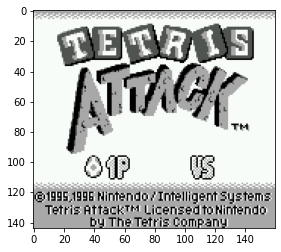

In [7]:
for i in range(30*60):
  emu.step()
boot_state = emu.get_state() 
plt.imshow(emu.get_screen()) 

In [8]:
def show_movie(frames):
  imageio.mimwrite('last.mp4', np.array(frames), fps=60)
  return IPython.display.HTML("""
<video width=512 controls autoplay><source src="%s" type="video/mp4"></video>
""" % ("data:video/mp4;base64," + base64.b64encode(open('last.mp4','rb').read()).decode()))
  
def sample_random_action():
  return sum([random.choice(choice) for choice in gamedata.valid_actions()])

In [9]:
#with tqdm(desc='steps') as i:
# action = sample_random_action()
# longest_screens = []
# emu.set_state(boot_state)
# for i in range(30*60*60): #(60*60*60):
#   if random.random() > .90:
#     action = sample_random_action()
#   emu.set_button_mask([(action>>i)&1 for i in range(9)], 0)
#   emu.step()
#   longest_screens.append(emu.get_screen())
# # last_screen = longest_screens[len(longest_screens) - 1]
# res = show_movie(longest_screens)
# del longest_screens
# res
#plt.imshow(emu.get_screen())

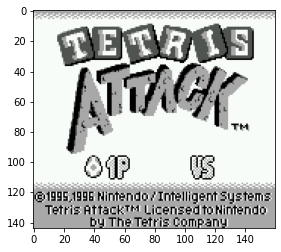

In [10]:
savedImage = emu.get_screen()
plt.imshow(emu.get_screen())


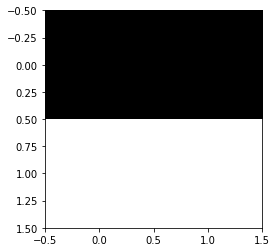

In [11]:
#144 160, 144/9 = 16, 160/10=16 (9,16,10,16)  (LOWEST detail, ORIGINAL)
#144 160, 144/18 = 8, 160/20=8 (18, 8, 20, 8) (MEDIUM detail)
#144 160, 144/36 = 4, 160/40=4 (36, 4, 40, 4) (HIGHEST detail)
#144 160, 144/144= 1, 160/160=1 (144, 1, 160, 1) no abstraction! highest eva! detail
#144 160, 144/4= 36, 160/40=4 (4, 36, 4, 40) 4x4 resolution
#144 160, 144/2= 72, 160/2=80 (2, 72, 2, 80) 2x2 resolution

plt.imshow(savedImage[:,:,0].reshape(2, 72, 2, 80).mean((1,3)).astype(int) & 0xf0,cmap='gray')

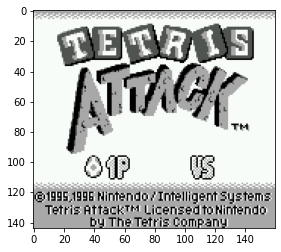

In [12]:
plt.imshow(emu.get_screen())

In [13]:
ORIGINAL = 0
MEDIUM = 1
HIGH = 2
NO_ABSTRACTION = 3
FOUR_BY_FOUR = 4
TWO_BY_TWO = 5


# ALTERNATIVE IMPLEMENTATIONS OF THIS FUNCTION
def screen_to_cell(screen, level_of_detail):
  # just takes the red channel, watch out for types being correct, 
  # could change the mask?
  # average color
  # keep more resolution? 
  # mask certain areas of the screen
  # as long as we have different representations and can say if they are worse or better
  # tiles touched, or cells uncovered, cannot be unique cells touched because we change what a cell is
  # we can't change what a cell is and count cells
  # which byte of memory contains the score, should be exploring high scoring states too
  # FIGURE: 3 diff cell representations and a chart of how many cells explored over time with a baseline
  # show how some are better or worse... from just the one picture they don't know what they are or how they could make them better
  # TRY 
      # ONE GREEN (ORIGINAL)
      # Collapse the channels, add the colors and divide by 3 (average all three channels)
      # Average color of cell
      # more fidelity of the cell by reshaping differently (screen is 144 160, 144/9 = 16, 160/10=16)
            # reshape(4, 26, 4, 40)
            # reshape(8, 18, 8, 20)
      # try not reshaping it at all reshape(1, 144, 1, 160)
      # take average of multiple frames, will likely work best at higher fidelity

  # EVALUATION
      # number of cells reached
      # how far we get in the game
      # the high score of the game

  # save out the runs in a numerical index... looking for number of cells touched, 
  # and we want a chart for all of the cells touched for each of the passes

  if level_of_detail == ORIGINAL:
    return (screen[:,:,0].reshape(9,16,10,16).mean((1,3)).astype(int) & 0xc0).astype('uint8').tobytes()

  if level_of_detail == MEDIUM:
    return (screen[:,:,0].reshape(18, 8, 20, 8).mean((1,3)).astype(int) & 0xc0).astype('uint8').tobytes()

  if level_of_detail == HIGH:
     return (screen[:,:,0].reshape(36, 4, 40, 4).mean((1,3)).astype(int) & 0xc0).astype('uint8').tobytes()

  if level_of_detail == NO_ABSTRACTION:
    return (screen[:,:,0].reshape(144, 1, 160, 1).mean((1,3)).astype(int) & 0xc0).astype('uint8').tobytes()

  if level_of_detail == FOUR_BY_FOUR:
    return (screen[:,:,0].reshape(4, 36, 4, 40).mean((1,3)).astype(int) & 0xc0).astype('uint8').tobytes()

  if level_of_detail == TWO_BY_TWO:
    return (screen[:,:,0].reshape(2, 72, 2, 80).mean((1,3)).astype(int) & 0xc0).astype('uint8').tobytes()

  return (screen[:,:,0].reshape(9,16,10,16).mean((1,3)).astype(int) & 0xc0).astype('uint8').tobytes()


def sample_random_action():
  return sum([random.choice(choice) for choice in gamedata.valid_actions()])

def show_movie(frames):
  imageio.mimwrite('last.mp4', np.array(frames), fps=60)
  return IPython.display.HTML("""
<video width=512 controls autoplay><source src="%s" type="video/mp4"></video>
""" % ("data:video/mp4;base64," + base64.b64encode(open('last.mp4','rb').read()).decode()))
  
def get_movie_file(frames):
  imageio.mimwrite('last.mp4', np.array(frames), fps=60)


def get_base64_compression(frames):
  imageio.mimwrite('last.mp4', np.array(frames), fps=60)
  return base64.b64encode(open('last.mp4','rb').read())


# Run exploration in Original State

Go Explore Baseline


In [14]:
NUM_ITERATIONS = 1000
STEPS_PER_ITERATION = 5*60
STICKY_RATE = 0.90

random.seed(0)

archive = {}

emu.set_state(boot_state)
emu.step() # so that frame will be current
boot_screen = emu.get_screen()

#plt.imshow(emu.get_screen())#

boot_cell = screen_to_cell(boot_screen, ORIGINAL)

archive[boot_cell] = {
    'trajectory': [],
    'state': boot_state,
    'visits': 1,
    'screens': [boot_screen]
}

progress_over_time = []



In [2]:
with tqdm(desc='new cells') as new_cells:
  for iteration in tqdm(range(NUM_ITERATIONS),desc='iterations'):

    # pick a cell
    probabilities = [1.0/v['visits'] for v in archive.values()]
    chosen_cell = random.choices(list(archive.keys()),weights=probabilities,k=1)[0]
    #chosen_cell = random.choice(list(archive.keys())) 

    # go to the cell
    emu.set_state(archive[chosen_cell]['state'])
    archive[chosen_cell]['visits'] += 1
    
    # local exploration from this cell
    trajectory = archive[chosen_cell]['trajectory'].copy()

    action = sample_random_action()

    for step in range(STEPS_PER_ITERATION):

      if random.random() > STICKY_RATE:
        action = sample_random_action()

      trajectory.append(action)
      emu.set_button_mask([(action>>i)&1 for i in range(9)], 0)
      emu.step()
      screen = emu.get_screen()
      cell = screen_to_cell(screen, ORIGINAL)

      if cell not in archive or len(trajectory) < len(archive[cell]['trajectory']):
        if cell not in archive:
          new_cells.update(1)
        archive[cell] = {
            'trajectory': trajectory.copy(),
            'state': emu.get_state(),
            'visits': 0,
            'screens': []
        }
      archive[cell]['visits'] += 1
      archive[cell]['screens'].append(screen)
      progress_over_time.append(len(archive))
      
      #if archive[cell]['visits'] > 2*archive[chosen_cell]['visits']:
      #  break
  
print(len(archive), 'cells reached')

NameError: ignored

In [ ]:
longest_trajectory = max([v['trajectory'] for v in archive.values()], key=len)
longest_screens = []
emu.set_state(boot_state)
for action in tqdm(longest_trajectory):
  emu.set_button_mask([(action>>i)&1 for i in range(9)], 0)
  emu.step()
  longest_screens.append(emu.get_screen())

res = show_movie(longest_screens)
del longest_screens
res

In [ ]:
plt.plot(progress_over_time);
progress_over_time[-1]/len(progress_over_time)

In [ ]:
plt.hist([v['visits'] for v in archive.values()],bins=100,log=True);

In [ ]:
plt.hist([len(v['trajectory']) for v in archive.values()],bins=100,log=True);

# MEDIUM LEVEL OF DETAIL GO EXPLORE

In [15]:

random.seed(0)

archive_medium = {}

emu.set_state(boot_state)
emu.step() # so that frame will be current
boot_screen = emu.get_screen()

#plt.imshow(emu.get_screen())#

boot_cell = screen_to_cell(boot_screen, MEDIUM)

archive_medium[boot_cell] = {
    'trajectory': [],
    'state': boot_state,
    'visits': 1,
    'screens': [boot_screen]
}

progress_over_time = []


In [16]:
with tqdm(desc='new cells') as new_cells:
  for iteration in tqdm(range(NUM_ITERATIONS),desc='iterations'):

    # pick a cell
    probabilities = [1.0/v['visits'] for v in archive_medium.values()]
    chosen_cell = random.choices(list(archive_medium.keys()),weights=probabilities,k=1)[0]
    #chosen_cell = random.choice(list(archive_medium.keys())) 

    # go to the cell
    emu.set_state(archive_medium[chosen_cell]['state'])
    archive_medium[chosen_cell]['visits'] += 1
    
    # local exploration from this cell
    trajectory = archive_medium[chosen_cell]['trajectory'].copy()

    action = sample_random_action()

    for step in range(STEPS_PER_ITERATION):

      if random.random() > STICKY_RATE:
        action = sample_random_action()

      trajectory.append(action)
      emu.set_button_mask([(action>>i)&1 for i in range(9)], 0)
      emu.step()
      screen = emu.get_screen()
      cell = screen_to_cell(screen, MEDIUM)

      if cell not in archive_medium or len(trajectory) < len(archive_medium[cell]['trajectory']):
        if cell not in archive_medium:
          new_cells.update(1)
        archive_medium[cell] = {
            'trajectory': trajectory.copy(),
            'state': emu.get_state(),
            'visits': 0,
            'screens': []
        }
      archive_medium[cell]['visits'] += 1
      archive_medium[cell]['screens'].append(screen)
      progress_over_time.append(len(archive_medium))
      
      
      #if archive[cell]['visits'] > 2*archive[chosen_cell]['visits']:
      #  break
  
print(len(archive_medium), 'cells reached')



20423 cells reached


In [17]:
longest_trajectory = max([v['trajectory'] for v in archive_medium.values()], key=len)
longest_screens = []
emu.set_state(boot_state)
for action in tqdm(longest_trajectory):
  emu.set_button_mask([(action>>i)&1 for i in range(9)], 0)
  emu.step()
  longest_screens.append(emu.get_screen())
last_screen = longest_screens[len(longest_screens) - 1]
res = show_movie(longest_screens)
del longest_screens
res

In [18]:
#last_screen

0.06807666666666666

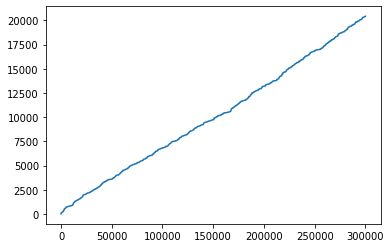

In [19]:
plt.plot(progress_over_time);
progress_over_time[-1]/len(progress_over_time)

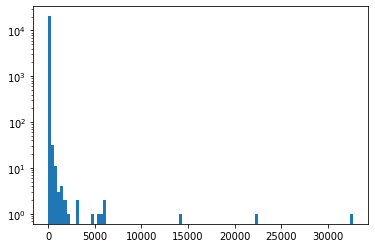

In [20]:
plt.hist([v['visits'] for v in archive_medium.values()],bins=100,log=True);

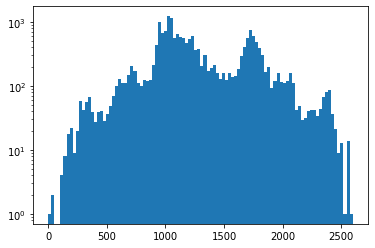

In [21]:
plt.hist([len(v['trajectory']) for v in archive_medium.values()],bins=100,log=True);



archive_medium: 20423
medium_archive_resized: 11960
difference between resized medium and original medium: 8463
resized/medium * 100 58%

COMPARE ORIGINAL AND MEDIUM
original - medium_resized -11959


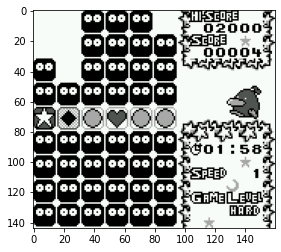

In [22]:
# comparing the results

medium_archive_resized = {}
for v in archive_medium.values():
  screens = v['screens']
  for screen in screens:
    cell = screen_to_cell(screen, ORIGINAL)
    if cell not in medium_archive_resized:
      medium_archive_resized[cell] = v


print("\narchive_medium: " + str(len(archive_medium)))
print("medium_archive_resized: " + str(len(medium_archive_resized)))
print("difference between resized medium and original medium: " + str(len(archive_medium) - len(medium_archive_resized)))
print("resized/medium * 100 " + str(int(len(medium_archive_resized)/len(archive_medium)*100)) + "%")

print("\nCOMPARE ORIGINAL AND MEDIUM")
print("original - medium_resized " + str(len(archive) - len(medium_archive_resized)))


plt.imshow(screen)



# HIGH LEVEL OF DETAIL GO EXPLORE

In [15]:

random.seed(0)

archive_high = {}

emu.set_state(boot_state)
emu.step() # so that frame will be current
boot_screen = emu.get_screen()

#plt.imshow(emu.get_screen())#

boot_cell = screen_to_cell(boot_screen, HIGH)

archive_high[boot_cell] = {
    'trajectory': [],
    'state': boot_state,
    'visits': 1,
    'screens': [boot_screen]
}

progress_over_time = []


In [17]:
with tqdm(desc='new cells') as new_cells:
  for iteration in tqdm(range(NUM_ITERATIONS),desc='iterations'):

    # pick a cell
    probabilities = [1.0/v['visits'] for v in archive_high.values()]
    chosen_cell = random.choices(list(archive_high.keys()),weights=probabilities,k=1)[0]
    #chosen_cell = random.choice(list(archive_high.keys())) 

    # go to the cell
    emu.set_state(archive_high[chosen_cell]['state'])
    archive_high[chosen_cell]['visits'] += 1
    
    # local exploration from this cell
    trajectory = archive_high[chosen_cell]['trajectory'].copy()

    action = sample_random_action()

    for step in range(STEPS_PER_ITERATION):

      if random.random() > STICKY_RATE:
        action = sample_random_action()

      trajectory.append(action)
      emu.set_button_mask([(action>>i)&1 for i in range(9)], 0)
      emu.step()
      screen = emu.get_screen()
      cell = screen_to_cell(screen, HIGH)

      if cell not in archive_high or len(trajectory) < len(archive_high[cell]['trajectory']):
        if cell not in archive_high:
          new_cells.update(1)
        archive_high[cell] = {
            'trajectory': trajectory.copy(),
            'state': emu.get_state(),
            'visits': 0,
            'screens': []
        }
      archive_high[cell]['visits'] += 1
      progress_over_time.append(len(archive_high))
      archive_high[cell]['screens'].append(screen)
      
      #if archive[cell]['visits'] > 2*archive[chosen_cell]['visits']:
      #  break
  
print(len(archive_high), 'cells reached')



35925 cells reached


In [18]:
longest_trajectory = max([v['trajectory'] for v in archive_high.values()], key=len)
longest_screens = []
emu.set_state(boot_state)
for action in tqdm(longest_trajectory):
  emu.set_button_mask([(action>>i)&1 for i in range(9)], 0)
  emu.step()
  longest_screens.append(emu.get_screen())

res = show_movie(longest_screens)
del longest_screens
res

In [ ]:
plt.plot(progress_over_time);
progress_over_time[-1]/len(progress_over_time)

In [ ]:
plt.hist([v['visits'] for v in archive_high.values()],bins=100,log=True);

In [ ]:
plt.hist([len(v['trajectory']) for v in archive_high.values()],bins=100,log=True);



archive_high: 35925
high_archive_resized: 18655
difference between resized high and original medium: 17270
resized/high * 100 51%

COMPARE ORIGINAL AND MEDIUM
original - high_resized -18654


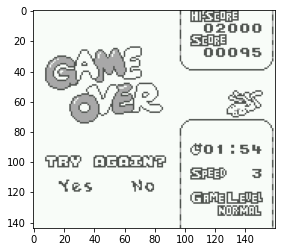

In [19]:
# comparing the results
high_archive_resized = {}
for v in archive_high.values():
  screens = v['screens']
  for screen in screens:
    cell = screen_to_cell(screen, ORIGINAL)
    if cell not in high_archive_resized:
      high_archive_resized[cell] = v


print("\narchive_high: " + str(len(archive_high)))
print("high_archive_resized: " + str(len(high_archive_resized)))
print("difference between resized high and original medium: " + str(len(archive_high) - len(high_archive_resized)))
print("resized/high * 100 " + str(int(len(high_archive_resized)/len(archive_high)*100)) + "%")

print("\nCOMPARE ORIGINAL AND MEDIUM")
print("original - high_resized " + str(len(archive) - len(high_archive_resized)))


plt.imshow(screen)

# NO ABSTRACTION VERSION

In [29]:

random.seed(0)

archive_no_abstraction = {}

emu.set_state(boot_state)
emu.step() # so that frame will be current
boot_screen = emu.get_screen()
boot_cell = screen_to_cell(boot_screen, NO_ABSTRACTION)

archive_no_abstraction[boot_cell] = {
    'trajectory': [],
    'state': boot_state,
    'visits': 1,
    'screens': [boot_screen]
}

progress_over_time = []

In [30]:
with tqdm(desc='new cells') as new_cells:
  for iteration in tqdm(range(NUM_ITERATIONS),desc='iterations'):

    # pick a cell
    probabilities = [1.0/v['visits'] for v in archive_no_abstraction.values()]
    chosen_cell = random.choices(list(archive_no_abstraction.keys()),weights=probabilities,k=1)[0]
    #chosen_cell = random.choice(list(archive_no_abstraction.keys())) 

    # go to the cell
    emu.set_state(archive_no_abstraction[chosen_cell]['state'])
    archive_no_abstraction[chosen_cell]['visits'] += 1
    
    # local exploration from this cell
    trajectory = archive_no_abstraction[chosen_cell]['trajectory'].copy()

    action = sample_random_action()

    for step in range(STEPS_PER_ITERATION):

      if random.random() > STICKY_RATE:
        action = sample_random_action()

      trajectory.append(action)
      emu.set_button_mask([(action>>i)&1 for i in range(9)], 0)
      emu.step()
      screen = emu.get_screen()
      cell = screen_to_cell(screen, NO_ABSTRACTION)

      if cell not in archive_no_abstraction or len(trajectory) < len(archive_no_abstraction[cell]['trajectory']):
        if cell not in archive_no_abstraction:
          new_cells.update(1)
        archive_no_abstraction[cell] = {
            'trajectory': trajectory.copy(),
            'state': emu.get_state(),
            'visits': 0,
            'screens': []
        }
      archive_no_abstraction[cell]['visits'] += 1
      progress_over_time.append(len(archive_no_abstraction))
      archive_no_abstraction[cell]['screens'].append(screen)
      
      #if archive[cell]['visits'] > 2*archive[chosen_cell]['visits']:
      #  break
  
print(len(archive_no_abstraction), 'cells reached')



42416 cells reached


In [31]:
longest_trajectory = max([v['trajectory'] for v in archive_no_abstraction.values()], key=len)
longest_screens = []
emu.set_state(boot_state)
for action in tqdm(longest_trajectory):
  emu.set_button_mask([(action>>i)&1 for i in range(9)], 0)
  emu.step()
  longest_screens.append(emu.get_screen())

res = show_movie(longest_screens)
del longest_screens
res

0.14138666666666666

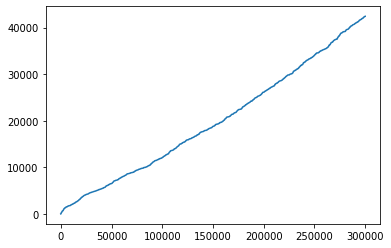

In [32]:
plt.plot(progress_over_time);
progress_over_time[-1]/len(progress_over_time)

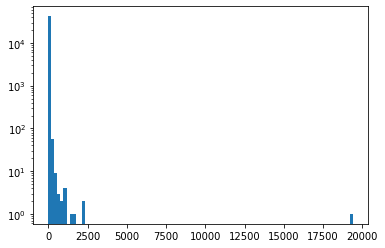

In [33]:
plt.hist([v['visits'] for v in archive_no_abstraction.values()],bins=100,log=True);

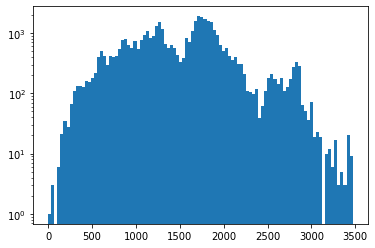

In [34]:
plt.hist([len(v['trajectory']) for v in archive_no_abstraction.values()],bins=100,log=True);



archive_no_abstraction: 42416
no_abstraction_archive_resized: 14302
difference between resized no abstraction and original : 28114
resized/no_abstraction * 100 33%

COMPARE ORIGINAL AND MEDIUM
original - no_abstraction_archive_resized -14301


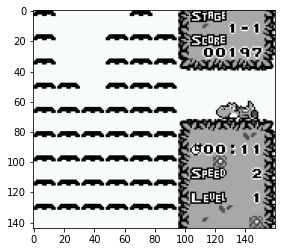

In [35]:
# comparing the results
no_abstraction_archive_resized = {}
for v in archive_no_abstraction.values():
  screens = v['screens']
  for screen in screens:
    cell = screen_to_cell(screen, ORIGINAL)
    if cell not in no_abstraction_archive_resized:
      no_abstraction_archive_resized[cell] = v


print("\narchive_no_abstraction: " + str(len(archive_no_abstraction)))
print("no_abstraction_archive_resized: " + str(len(no_abstraction_archive_resized)))
print("difference between resized no abstraction and original : " + str(len(archive_no_abstraction) - len(no_abstraction_archive_resized)))
print("resized/no_abstraction * 100 " + str(int(len(no_abstraction_archive_resized)/len(archive_no_abstraction)*100)) + "%")

print("\nCOMPARE ORIGINAL AND MEDIUM")
print("original - no_abstraction_archive_resized " + str(len(archive) - len(no_abstraction_archive_resized)))


plt.imshow(screen)

# Four by Four

In [17]:

random.seed(0)

archive_four_by_four = {}

emu.set_state(boot_state)
emu.step() # so that frame will be current
boot_screen = emu.get_screen()
boot_cell = screen_to_cell(boot_screen, NO_ABSTRACTION)

archive_four_by_four[boot_cell] = {
    'trajectory': [],
    'state': boot_state,
    'visits': 1,
    'screens': [boot_screen]
}

progress_over_time = []

In [18]:
with tqdm(desc='new cells') as new_cells:
  for iteration in tqdm(range(NUM_ITERATIONS),desc='iterations'):

    # pick a cell
    probabilities = [1.0/v['visits'] for v in archive_four_by_four.values()]
    chosen_cell = random.choices(list(archive_four_by_four.keys()),weights=probabilities,k=1)[0]
    #chosen_cell = random.choice(list(archive_four_by_four.keys())) 

    # go to the cell
    emu.set_state(archive_four_by_four[chosen_cell]['state'])
    archive_four_by_four[chosen_cell]['visits'] += 1
    
    # local exploration from this cell
    trajectory = archive_four_by_four[chosen_cell]['trajectory'].copy()

    action = sample_random_action()

    for step in range(STEPS_PER_ITERATION):

      if random.random() > STICKY_RATE:
        action = sample_random_action()

      trajectory.append(action)
      emu.set_button_mask([(action>>i)&1 for i in range(9)], 0)
      emu.step()
      screen = emu.get_screen()
      cell = screen_to_cell(screen, NO_ABSTRACTION)

      if cell not in archive_four_by_four or len(trajectory) < len(archive_four_by_four[cell]['trajectory']):
        if cell not in archive_four_by_four:
          new_cells.update(1)
        archive_four_by_four[cell] = {
            'trajectory': trajectory.copy(),
            'state': emu.get_state(),
            'visits': 0,
            'screens': []
        }
      archive_four_by_four[cell]['visits'] += 1
      progress_over_time.append(len(archive_four_by_four))
      archive_four_by_four[cell]['screens'].append(screen)
      
      #if archive[cell]['visits'] > 2*archive[chosen_cell]['visits']:
      #  break
  
print(len(archive_four_by_four), 'cells reached')



42416 cells reached


In [19]:
longest_trajectory = max([v['trajectory'] for v in archive_four_by_four.values()], key=len)
longest_screens = []
emu.set_state(boot_state)
for action in tqdm(longest_trajectory):
  emu.set_button_mask([(action>>i)&1 for i in range(9)], 0)
  emu.step()
  longest_screens.append(emu.get_screen())

res = show_movie(longest_screens)
del longest_screens
res

0.14138666666666666

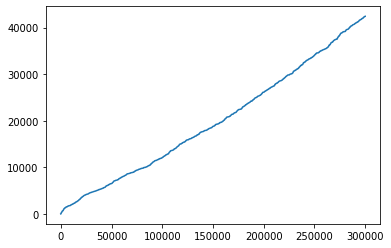

In [20]:
plt.plot(progress_over_time);
progress_over_time[-1]/len(progress_over_time)

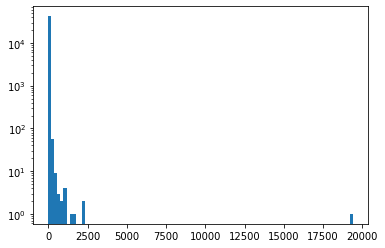

In [21]:
plt.hist([v['visits'] for v in archive_four_by_four.values()],bins=100,log=True);

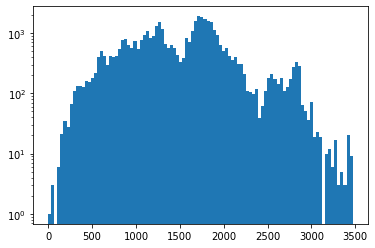

In [22]:
plt.hist([len(v['trajectory']) for v in archive_four_by_four.values()],bins=100,log=True);


In [20]:
# comparing the results
four_by_four_archive_resized = {}
countTrue = 0
countFalse = 0
for v in archive_four_by_four.values():
  screens = v['screens']
  #print(len(screens))
  #count += 1
  if count > 2:
    break
  for screen in screens:
    cell = screen_to_cell(screen, ORIGINAL)
    if (cell in four_by_four_archive_resized):
      countTrue += 1
    else:
      countFalse += 1
    four_by_four_archive_resized[cell] = v

print("countTrue " + str(countTrue))
print("countFalse " + str(countFalse))
print("\narchive_four_by_four: " + str(len(archive_four_by_four)))
print("four_by_four_archive_resized: " + str(len(four_by_four_archive_resized)))
print("difference between resized no abstraction and original : " + str(len(archive_four_by_four) - len(four_by_four_archive_resized)))
print("resized/no_abstraction * 100 " + str(int(len(four_by_four_archive_resized)/len(archive_four_by_four)*100)) + "%")

print("\nCOMPARE ORIGINAL AND MEDIUM")
print("original - no_abstraction_archive_resized " + str(len(archive) - len(four_by_four_archive_resized)))


plt.imshow(screen)

NameError: ignored

In [ ]:
for v in archive_four_by_four.values():
  

# Two by Two

In [15]:

random.seed(0)

archive_two_by_two = {}

emu.set_state(boot_state)
emu.step() # so that frame will be current
boot_screen = emu.get_screen()
boot_cell = screen_to_cell(boot_screen, NO_ABSTRACTION)

archive_two_by_two[boot_cell] = {
    'trajectory': [],
    'state': boot_state,
    'visits': 1,
    'screens': [boot_screen]
}

progress_over_time = []

In [17]:
with tqdm(desc='new cells') as new_cells:
  for iteration in tqdm(range(NUM_ITERATIONS),desc='iterations'):

    # pick a cell
    probabilities = [1.0/v['visits'] for v in archive_two_by_two.values()]
    chosen_cell = random.choices(list(archive_two_by_two.keys()),weights=probabilities,k=1)[0]
    #chosen_cell = random.choice(list(archive_two_by_two.keys())) 

    # go to the cell
    emu.set_state(archive_two_by_two[chosen_cell]['state'])
    archive_two_by_two[chosen_cell]['visits'] += 1
    
    # local exploration from this cell
    trajectory = archive_two_by_two[chosen_cell]['trajectory'].copy()

    action = sample_random_action()

    for step in range(STEPS_PER_ITERATION):

      if random.random() > STICKY_RATE:
        action = sample_random_action()

      trajectory.append(action)
      emu.set_button_mask([(action>>i)&1 for i in range(9)], 0)
      emu.step()
      screen = emu.get_screen()
      cell = screen_to_cell(screen, NO_ABSTRACTION)

      if cell not in archive_two_by_two or len(trajectory) < len(archive_two_by_two[cell]['trajectory']):
        if cell not in archive_two_by_two:
          new_cells.update(1)
        archive_two_by_two[cell] = {
            'trajectory': trajectory.copy(),
            'state': emu.get_state(),
            'visits': 0,
            'screens': []
        }
      archive_two_by_two[cell]['visits'] += 1
      progress_over_time.append(len(archive_two_by_two))
      archive_two_by_two[cell]['screens'].append(screen)
      
      #if archive[cell]['visits'] > 2*archive[chosen_cell]['visits']:
      #  break
  
print(len(archive_two_by_two), 'cells reached')



37131 cells reached


In [ ]:
longest_trajectory = max([v['trajectory'] for v in archive_two_by_two.values()], key=len)
longest_screens = []
emu.set_state(boot_state)
for action in tqdm(longest_trajectory):
  emu.set_button_mask([(action>>i)&1 for i in range(9)], 0)
  emu.step()
  longest_screens.append(emu.get_screen())

res = show_movie(longest_screens)
del longest_screens
res

In [ ]:
plt.plot(progress_over_time);
progress_over_time[-1]/len(progress_over_time)

In [ ]:
plt.hist([v['visits'] for v in archive_two_by_two.values()],bins=100,log=True);


aarchive_two_by_two: 37131
two_by_two_archive_resized: 14195
difference between resized no abstraction and original : 22936
resized/no_abstraction * 100 38%

COMPARE ORIGINAL AND MEDIUM
original - no_abstraction_archive_resized -14194


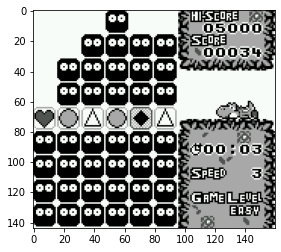

In [21]:
# comparing the results
two_by_two_archive_resized = {}
savedValue = None
for v in archive_two_by_two.values():
  savedValue = v
  screens = v['screens']
  for screen in screens:
    cell = screen_to_cell(screen, ORIGINAL)
    if cell not in two_by_two_archive_resized:
      two_by_two_archive_resized[cell] = v


print("\naarchive_two_by_two: " + str(len(archive_two_by_two)))
print("two_by_two_archive_resized: " + str(len(two_by_two_archive_resized)))
print("difference between resized no abstraction and original : " + str(len(archive_two_by_two) - len(two_by_two_archive_resized)))
print("resized/no_abstraction * 100 " + str(int(len(two_by_two_archive_resized)/len(archive_two_by_two)*100)) + "%")

print("\nCOMPARE ORIGINAL AND MEDIUM")
print("original - no_abstraction_archive_resized " + str(len(archive) - len(two_by_two_archive_resized)))


plt.imshow(screen)

TypeError: ignored

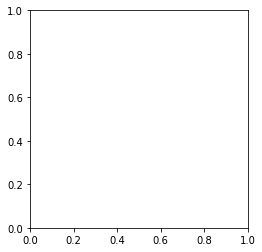

In [23]:
#plt.imshow(screen_to_cell(savedValue['screens'][0], ORIGINAL))

In [ ]:
plt.hist([len(v['trajectory']) for v in archive_two_by_two.values()],bins=100,log=True);


# Group Frames


In [15]:
STEP_COUNT = 5
def get_average_screen():
  average_screen = emu.get_screen()
  for i in range(int(STEP_COUNT)):
    emu.step() # step to next frame
    average_screen += emu.get_screen()

  for i in range(len(average_screen)):
    for j in range(len(average_screen[i])):
      average_screen[i][j] = average_screen[i][j]/STEP_COUNT
  return average_screen

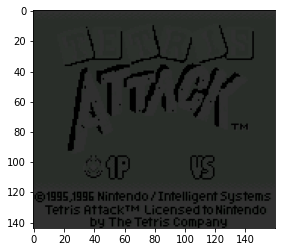

In [16]:

random.seed(0)

archive_group_frames = {}

emu.set_state(boot_state)
for i in range(2000):
  emu.step()


average_screen = get_average_screen()
plt.imshow(average_screen)

boot_screen = emu.get_screen()
boot_cell = screen_to_cell(average_screen, NO_ABSTRACTION)

archive_group_frames[boot_cell] = {
    'trajectory': [],
    'state': boot_state,
    'visits': 1,
    'screens': [average_screen]
}

progress_over_time = []

In [ ]:
with tqdm(desc='new cells') as new_cells:
  for iteration in tqdm(range(NUM_ITERATIONS),desc='iterations'):

    # pick a cell
    probabilities = [1.0/v['visits'] for v in archive_group_frames.values()]
    chosen_cell = random.choices(list(archive_group_frames.keys()),weights=probabilities,k=1)[0]
    #chosen_cell = random.choice(list(archive_four_by_four.keys())) 

    # go to the cell
    emu.set_state(archive_group_frames[chosen_cell]['state'])
    archive_group_frames[chosen_cell]['visits'] += 1
    
    # local exploration from this cell
    trajectory = archive_group_frames[chosen_cell]['trajectory'].copy()

    action = sample_random_action()
    average_screens = []

    for step in range(int(STEPS_PER_ITERATION)): #/STEP_COUNT)):
      average_screen = emu.get_screen()
      for s in range(STEP_COUNT):
        
        if random.random() > STICKY_RATE:
          action = sample_random_action()

        trajectory.append(action)
        emu.set_button_mask([(action>>i)&1 for i in range(9)], 0)
        emu.step()        
        average_screen += emu.get_screen()

      screen = average_screen
      cell = screen_to_cell(screen, NO_ABSTRACTION)
      average_screens.append(screen)
      # for i in range(len(average_screen)):
      #   for j in range(len(average_screen[i])):
      #     average_screen[i][j] = average_screen[i][j]/STEP_COUNT
        
      if cell not in archive_group_frames or len(trajectory) < len(archive_group_frames[cell]['trajectory']):
          if cell not in archive_group_frames:
            new_cells.update(1)
          archive_group_frames[cell] = {
              'trajectory': trajectory.copy(),
              'state': emu.get_state(),
              'visits': 0,
              'screens': []
          }
      archive_group_frames[cell]['visits'] += 1
      progress_over_time.append(len(archive_group_frames))
      archive_group_frames[cell]['screens'].append(average_screen)
      
  
print(len(archive_group_frames), 'cells reached')
plt.imshow(average_screens[5])

In [ ]:
plt.imshow(average_screens[0])

In [ ]:
longest_trajectory = max([v['trajectory'] for v in archive_group_frames.values()], key=len)
longest_screens = []
emu.set_state(boot_state)
for action in tqdm(longest_trajectory):
  emu.set_button_mask([(action>>i)&1 for i in range(9)], 0)
  emu.step()
  longest_screens.append(emu.get_screen())

res = show_movie(longest_screens)
del longest_screens
res

In [ ]:
plt.plot(progress_over_time);
progress_over_time[-1]/len(progress_over_time)

In [ ]:
plt.hist([v['visits'] for v in archive_group_frames.values()],bins=100,log=True);

In [ ]:
plt.hist([len(v['trajectory']) for v in archive_group_frames.values()],bins=100,log=True);


In [ ]:
# comparing the results
group_frames_archive_resized = {}
for v in archive_group_frames.values():
  screens = v['screens']
  for screen in screens:
    cell = screen_to_cell(screen, ORIGINAL)
    if cell not in group_frames_archive_resized:
      group_frames_archive_resized[cell] = v


print("\narchive_group_frames: " + str(len(archive_group_frames)))
print("group_frames_archive_resized: " + str(len(group_frames_archive_resized)))
print("difference between resized no abstraction and original : " + str(len(archive_group_frames) - len(group_frames_archive_resized)))
print("resized/group_frames * 100 " + str(int(len(group_frames_archive_resized)/len(archive_group_frames)*100)) + "%")

print("\nCOMPARE ORIGINAL AND MEDIUM")
print("original - group_frames_archive_resized " + str(len(archive) - len(group_frames_archive_resized)))


plt.imshow(screen)

# ANALYSIS OF ABOVE METHODS!

<BarContainer object of 6 artists>

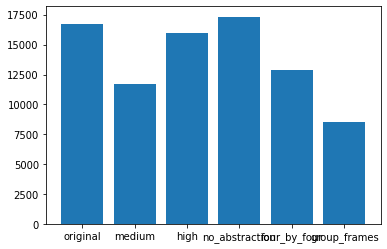

In [ ]:
x = ["original", "medium", "high", "no_abstraction", "four_by_four", "group_frames"]
y = [len(archive), len(medium_archive_resized), len(high_archive_resized), len(no_abstraction_archive_resized), len(four_by_four_archive_resized), len(group_frames_archive_resized)]
plt.bar(x,y)

In [ ]:
print(len(group_frames_archive_resized))

4080
